In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.R&D Spend -- Research and devolop spend in the past few 
yearsAdministration -- spend on administration in the past few yearsMarketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected Profit  -- profit of each state in the past few years

In [2]:
#Load the Data
stp=pd.read_csv("50_Startups.csv")
stp.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#Check for Missing values in the given data
stp.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
stp=stp.rename(columns={"R&D Spend":"rdspend","Marketing Spend":"marketingspend"})
stp.head()

,rdspend,Administration,marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
stp.corr()

,rdspend,Administration,marketingspend,Profit
rdspend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
marketingspend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


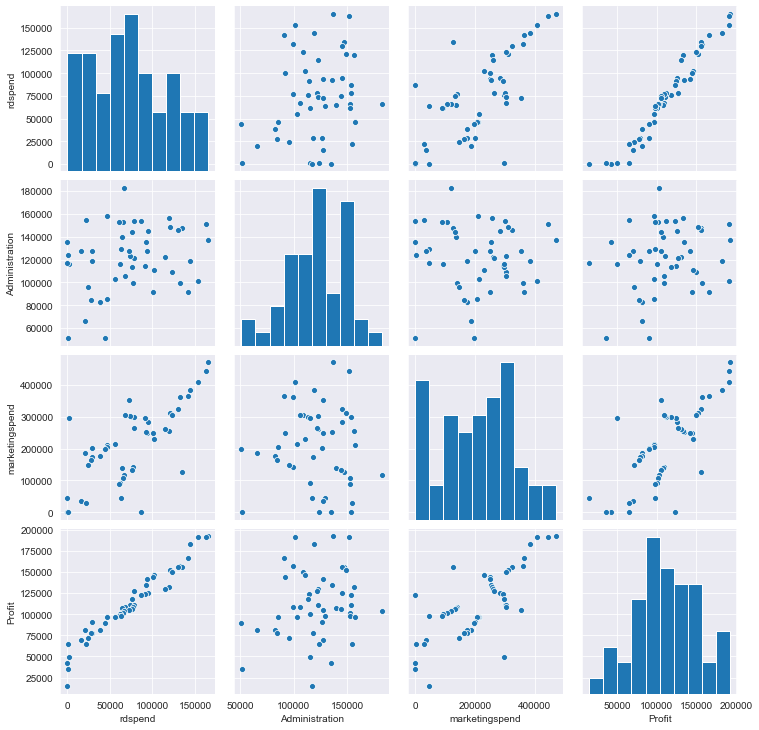

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(stp)

Based on the correlation values and scatter plot we can develop logic for multiple linear regression

# To build a model profit based on the other variables

In [8]:
import statsmodels.formula.api as smf # for regression model

In [9]:
ml1 = smf.ols('Profit~rdspend+Administration+marketingspend',data=stp).fit() # regression model

In [10]:
ml1

In [11]:
#To know the coefficients
ml1.params

Intercept         50122.192990
rdspend               0.805715
Administration       -0.026816
marketingspend        0.027228
dtype: float64

In [12]:
#To know t and p values
print(ml1.tvalues, '\n', ml1.pvalues)

Intercept          7.626218
rdspend           17.846374
Administration    -0.525507
marketingspend     1.655077
dtype: float64 
 Intercept         1.057379e-09
rdspend           2.634968e-22
Administration    6.017551e-01
marketingspend    1.047168e-01
dtype: float64


In [13]:
#R squared values
(ml1.rsquared,ml1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [14]:
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           4.53e-30
Time:                        13:03:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rdspend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketingspend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Here we found administration and Marketing spend as insignificant though there p values > 0.05, remove from the equation and try to develop the model

we cannot remove insig. var just bcoz of insig. bcoz we invested time and money in collecting data

# check Independently

In [43]:
ml_A=smf.ols('Profit~Administration',data=stp).fit()  
#t and p-Values
print(ml_A.tvalues, '\n', ml_A.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [44]:
ml_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 23 Dec 2020   Prob (F-statistic):              0.162
Time:                        13:04:11   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# p-value >0.05 .. It is insignificant # 

In [45]:
ml_M=smf.ols('Profit~marketingspend',data = stp).fit()  
ml_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           4.38e-10
Time:                        13:04:14   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept           6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
marketingspend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
print(ml_M.tvalues, '\n', ml_M.pvalues)

Intercept         7.808356
marketingspend    7.802657
dtype: float64 
 Intercept         4.294735e-10
marketingspend    4.381073e-10
dtype: float64


# p-value <0.05 .. It is significant

In [47]:
ml_AM=smf.ols('Profit~Administration+marketingspend',data = stp).fit()  
ml_AM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           2.50e-10
Time:                        13:04:18   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
marketingspend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [20]:
rsq_rd = smf.ols('rdspend~Administration+marketingspend',data=stp).fit().rsquared  
vif_rd = 1/(1-rsq_rd) # 16.33

rsq_A = smf.ols('Administration~marketingspend+rdspend',data=stp).fit().rsquared  
vif_A = 1/(1-rsq_A) # 564.98

rsq_ms = smf.ols('marketingspend~rdspend+Administration',data=stp).fit().rsquared  
vif_ms = 1/(1-rsq_ms) #  564.84
# Storing vif values in a data frame
d1 = {'Variables':['rdspend','Administration','marketingspend'],'VIF':[vif_rd,vif_A,vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rdspend,2.468903
1,Administration,1.175091
2,marketingspend,2.326773


#logic of vif is to solve the problem of multicolliniarity which ever the variable      is having highest vif value that variable removed from the eqn

# Residual Analysis

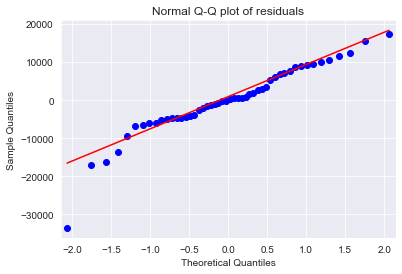

In [21]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(ml1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(ml1.resid>5)) 

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity


In [60]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

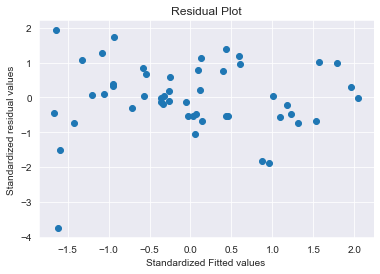

In [24]:
plt.scatter(get_standardized_values(ml1.fittedvalues),
            get_standardized_values(ml1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

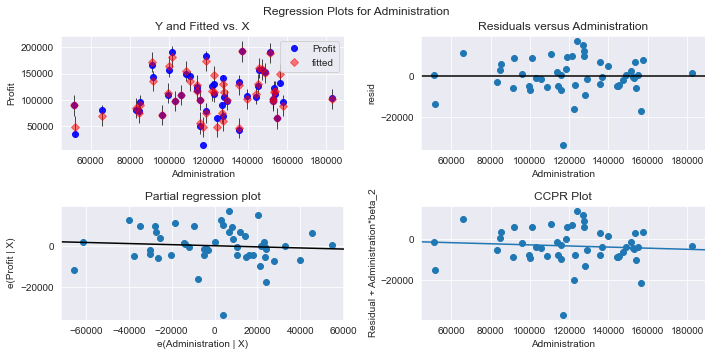

In [25]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(ml1, "Administration", fig=fig)
plt.show()

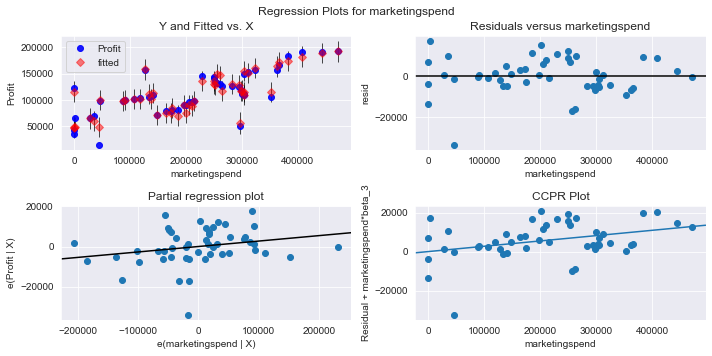

In [26]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(ml1, "marketingspend", fig=fig)
plt.show()

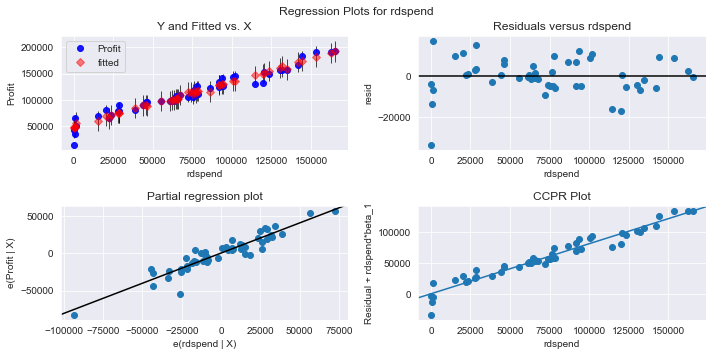

In [27]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(ml1, "rdspend", fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

In [28]:
model_influence = ml1.get_influence()
(c, _) = model_influence.cooks_distance

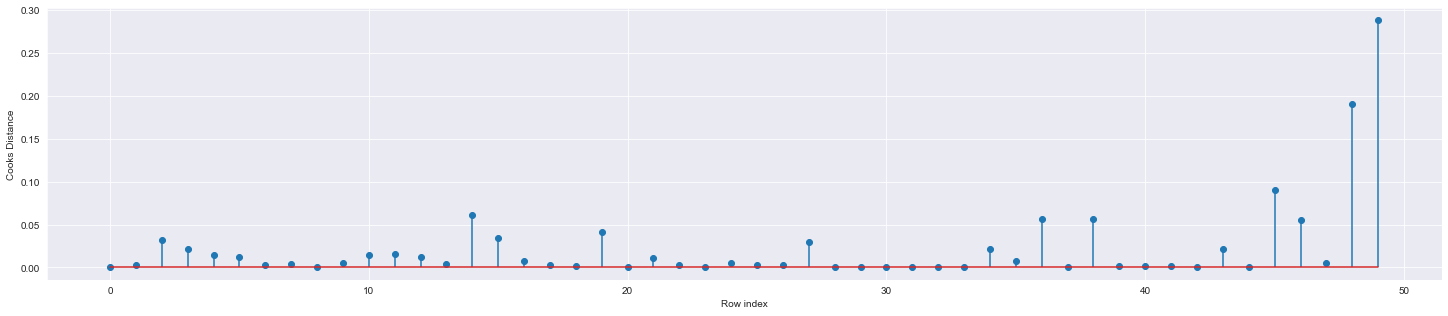

In [29]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(25, 5))
plt.stem(np.arange(len(stp)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

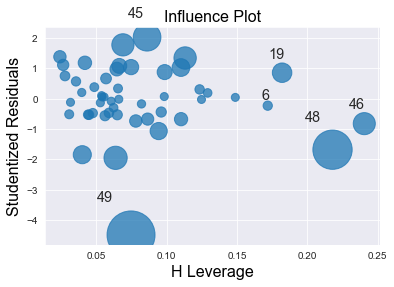

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(ml1)
plt.show()

In [32]:
k=stp.shape[1]
n=stp.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

# From the above plot, it is evident that data point 49 and 48 are the influencers

In [33]:
stp[stp.index.isin([49, 48])]

,rdspend,Administration,marketingspend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [34]:
#See the differences in the variables and their values
stp.head()

,rdspend,Administration,marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [35]:
stp_new = pd.read_csv("50_Startups.csv")

In [36]:
#Discard the data points which are influencers and reasign the row number (reset_index())
stp1=stp_new.drop(stp_new.index[[48,46]],axis=0).reset_index()
stp1 

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
stp1=stp1.drop(['index'],axis=1)

In [38]:
stp1=stp1.rename(columns={"R&D Spend":"rdspend","Marketing Spend":"marketingspend"})
stp1.head()

,rdspend,Administration,marketingspend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Build Model

In [39]:
#Exclude variable "adminstration" and generate R-Squared and AIC values
final_ml1_M= smf.ols('Profit~rdspend+marketingspend',data = stp1).fit()

In [40]:
(final_ml1_M.rsquared,final_ml1_M.aic)

(0.9464935318776808, 1014.1359794141389)

In [41]:
#Exclude variable "marketingspend" and generate R-Squared and AIC values
final_ml1_A= smf.ols('Profit~rdspend+Administration',data = stp1).fit()
(final_ml1_A.rsquared,final_ml1_A.aic)


(0.9452001414842283, 1015.2824625842915)

In [56]:
final_ml1_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     398.0
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           2.45e-29
Time:                        13:11:05   Log-Likelihood:                -504.07
No. Observations:                  48   AIC:                             1014.
Df Residuals:                      45   BIC:                             1020.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.837e+04   2807.622     17.229      0.000    4.27e+04     5.4e+04
rdspend            0.7730      0.046     16.876      0.000       0.681       0.865
marketingspend     0.0337      0.017      1.999      0.052      -0.000       0.068
==============================================================================
Omnibus:                       20.441   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.923
Skew:                          -1.205   Prob(JB):                     5.82e-09
Kurtosis:                       6.627   Cond. No.                     5.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Comparing above R-Square and AIC values, model 'final_ml1_M' has high R- square and low AIC value hence include variable 'marketing spend' so that multi collinearity problem would be resolved.

# Cooks distance



In [50]:
model_influence_M = final_ml1_M.get_influence()
(c_M, _) = model_influence_M.cooks_distance

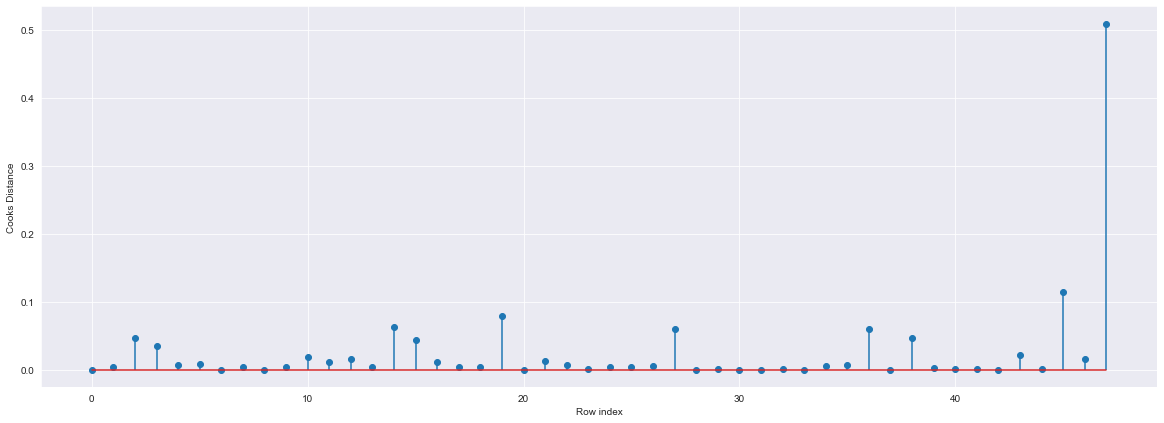

In [51]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(stp1)),np.round(c_M,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [52]:
#index of the data points where c is more than .5
(np.argmax(c_M),np.max(c_M))

(47, 0.5088903204107872)

# Predicting for new data¶

In [53]:
import statsmodels.formula.api as smf
final_ml1_A.predict(stp1.iloc[0:5,])


0    189114.918704
1    185527.769135
2    182053.228992
3    172826.550504
4    173244.217393
dtype: float64

In [54]:
pred_A = final_ml1_A.predict(stp1)

In [55]:
pred_A

0     189114.918704
1     185527.769135
2     182053.228992
3     172826.550504
4     173244.217393
5     163811.762352
6     162068.462676
7     158537.024836
8     149958.802498
9     155778.534029
10    137379.536258
11    137939.926984
12    129089.682317
13    126793.862606
14    148775.553511
15    147079.893685
16    116089.624288
17    128238.165844
18    128419.984026
19    120500.976462
20    115256.835592
21    113643.307976
22    112567.104476
23    108531.083069
24    117183.603695
25    103183.470299
26    111866.796401
27    110523.951262
28    100658.585837
29    102825.261346
30    102966.644935
31     99049.529247
32    103003.025514
33     98515.392357
34     86098.800072
35     91994.642582
36     73613.850593
37     93243.098473
38     71689.101920
39     85826.067652
40     74422.698977
41     76598.823581
42     71992.487689
43     62385.632673
44     65706.813065
45     50316.152162
46     48495.355514
47     50081.205943
dtype: float64

# R^2 value is 95% So Our Model is too sufficient and P value is also less than 0.05
# Here Administration variable  coliniarity to the marketing.spend so ignore that as the input variable consider only independent variable as R.D. spend and Marketing.spend  

# Conclusion: if we want to Predict the Profit for 50 startup the independent variables consideration is R.D.Spend and Marketing.Spend